# Principal Component Analysis (PCA)

### Step 1 - import libraries

In [2]:
import pandas as pd # for data manipulation
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
from sklearn.preprocessing import StandardScaler # for data standardization
from sklearn.decomposition import PCA # for PCA analysis

# Other utilities
import sys
import os

# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])

### Step 2 - Get the Australian weather data for our model (from Kaggle)
- Donwload from: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package
- After downloading it, we read csv into a Pandas dataframe

In [5]:
# Set Pandas options to display more columns
pd.options.display.max_columns=50

# Read in the weather data csv
df=pd.read_csv(main_dir+'/data/weatherAUS.csv', encoding='utf-8')

# Drop records where target RainTomorrow=NaN
df=df[pd.isnull(df['RainTomorrow'])==False]

# For other columns with missing values, fill them in with column mean
df=df.fillna(df.mean())

# Create a flag for RainToday and RainTomorrow
# Note, RainTomorrowFlag would be used as a target variable for prediction model
df['RainTodayFlag']=df['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)
df['RainTomorrowFlag']=df['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

# Show dataframe
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTodayFlag,RainTomorrowFlag
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,No,No,0,0
145455,2017-06-21,Uluru,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,No,No,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,No,No,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,No,No,0,0


### Step 3 - Assess correlation in the data

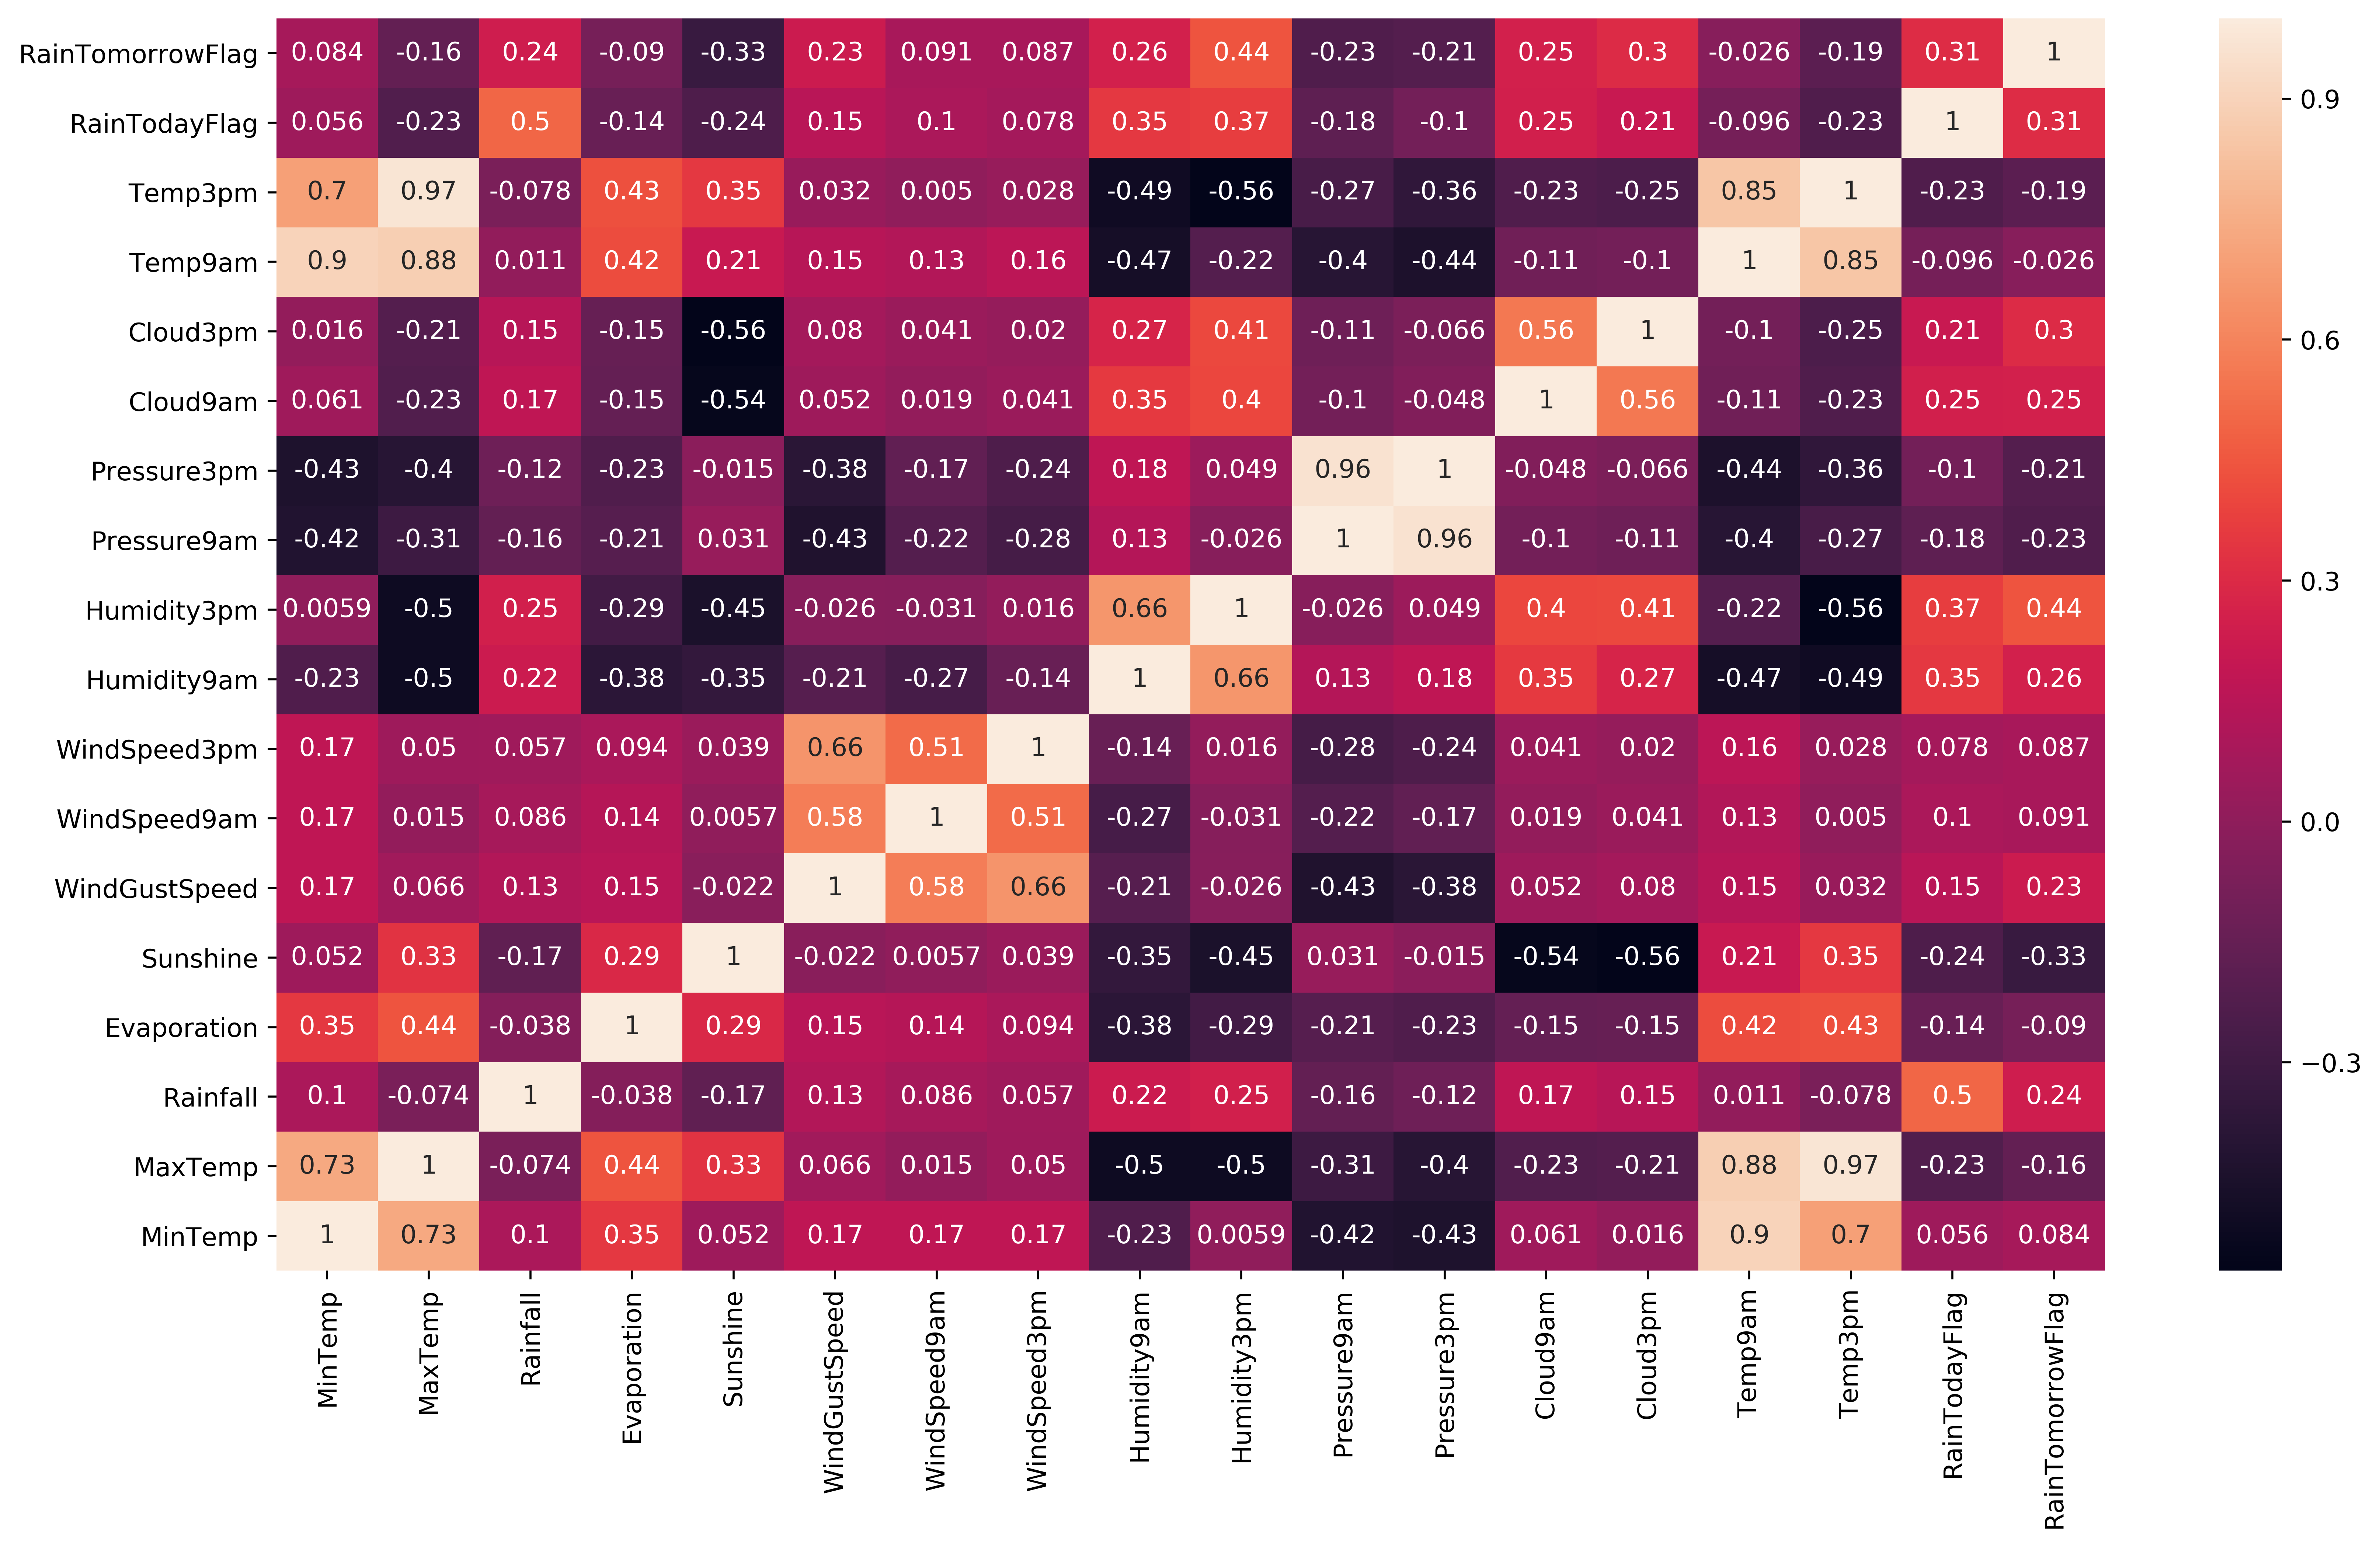

In [29]:
# Create a correlation matrix
corrMatrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(16,9), dpi=500)
sns.heatmap(corrMatrix, annot=True) 
plt.ylim(bottom=0, top=18)
plt.show()

### Step 4 - Perform PCA on all but a target (RainTomorrowFlag) variable

##### Standardize data

In [30]:
# Select all numerical features (17) with an exception of a target variable (RainTomorrowFlag)
X=df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
      'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
      'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 
      'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTodayFlag'
     ]]

# Get scaler
scaler=StandardScaler()

# Perform standard scaling 
X_std=scaler.fit_transform(X)

##### Perform PCA

In [31]:
# Select the model and its parameters
pca = PCA(n_components=17)

# Fit the model
X_trans=pca.fit_transform(X_std)

# Print the results
print('*************** PCA Summary ***************')
print('No. of features: ', pca.n_features_)
print('No. of samples: ', pca.n_samples_)
print('No. of components: ', pca.n_components_)
print('Explained variance ratio: ', pca.explained_variance_ratio_)

*************** PCA Summary ***************
No. of features:  17
No. of samples:  142193
No. of components:  17
Explained variance ratio:  [0.30473734 0.19327251 0.11661159 0.07343159 0.06477021 0.04686651
 0.04244543 0.03124602 0.0283     0.02562401 0.02453296 0.01950429
 0.01702357 0.00621854 0.00223226 0.0017376  0.00144558]


##### Plot results on a bar chart

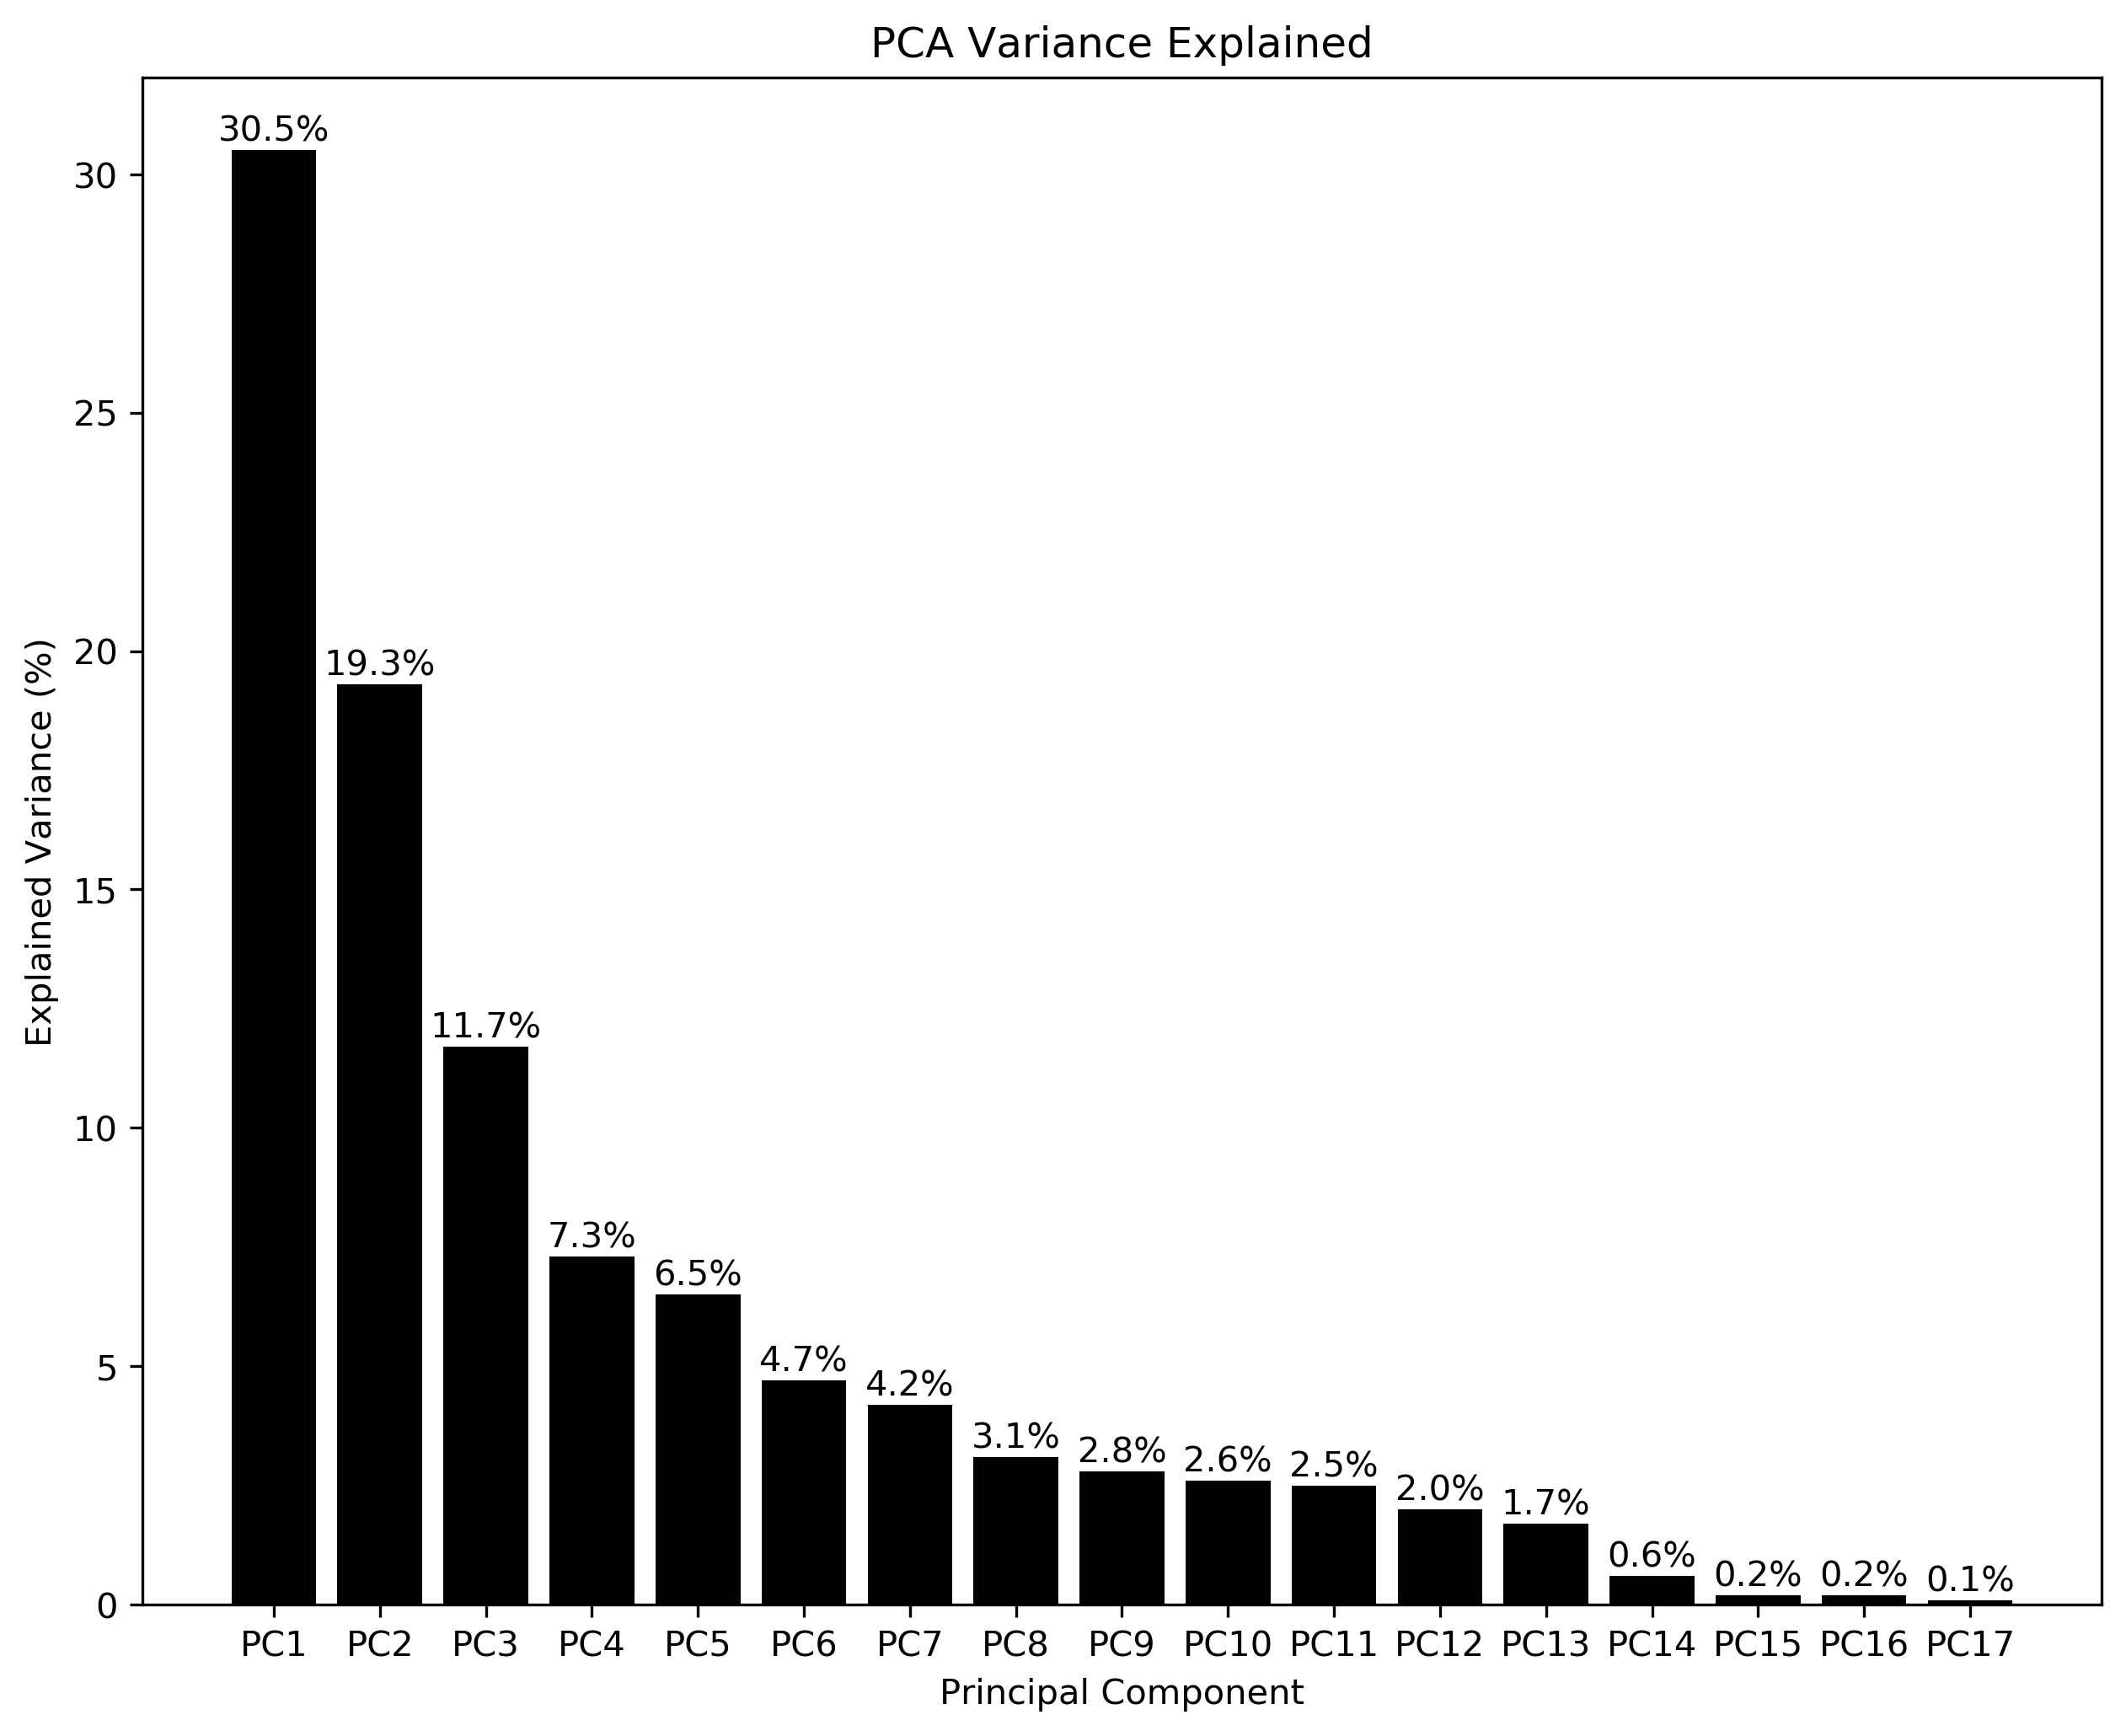

In [32]:
# Plot the explained variance on a bar chart
# Set x and y axis
x_ax=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 
     'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17']
y_ax=pca.explained_variance_ratio_.round(3)*100

# Create a plot
plt.figure(figsize=(10,8), dpi=300)
plt.bar(x=x_ax, height=y_ax, color='black')

# Annotate chart by adding values on top of the bars
for i in range(len(x_ax)):
    plt.text(i,y_ax[i]+0.2,str(y_ax[i].round(3))+'%', ha = 'center')

# Set title for chart and axis        
plt.title(label='PCA Variance Explained', loc='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')

plt.show()

- Top 6 capture 80% of the variance
- Top 11 capture 95% of the variance
- Top 13 capture 99% of the variance

# End of Program